# [Dataset](https://www.kaggle.com/datasets/juledz/heart-attack-prediction?resource=download)

Categorias do dataset:
| Categoria  | Significado                                           |    Tipo           | Valores |
| ---        |     ---                                               | ---               | ---     |
| `age`      | Idade                                                 | Numérico          | 29 - 77 |
| `sex`      | Sexo                                                  | Categórico        | 0 - Feminino <br> 1 - Masculino |
| `cp`       | Tipo de Dor no Peito                                  | Categórico        | 0 - Angina Típica <br> 1 - Angina Atípica <br> 2 - Dor Não Anginosa <br> 3 - Assintomática |
| `trestbps` | Pressão Arterial em Repouso                           | Numérico          | 94 - 200 |
| `chol`     | Colesterol Sérico                                     | Numérico em mg/dL | 126 - 564 |
| `fbs`      | Açúcar no Sangue em Jejum                             | Categórico        | 0 - <= 120 mg/dL <br> 1 - > 120 mg/dL |
| `restecg`  | Resultados Eletrocardiográficos em Repouso            | Categórico        | 0 - Normal <br> 1 - Anormal <br> 2 - Hipertrofia |
| `thalach`  | Frequência Cardíaca Máxima Alcançada                  | Numérico          | 71 - 202 |
| `exang`    | Angina Induzida por Exercício                         | Categórico        | 0 - Não <br> 1 - Sim |
| `oldpeak`  | Oldpeak (ST Depression)                               | Numérico          | 0.0 - 6.2 |
| `slope`    | Slope of Peak Exercise ST Segment                     | Categórico        | 0 - Subindo <br> 1 - Plano <br> 2 - Declive |
| `ca`       | Número de Vasos Principais Coloridos por Fluoroscopia | Numérico          | 0 - 3 |
| `thal`     | Talassemia                                            | Categórico        | 0 - Normal <br> 1 - Fixed Defect <br> 2 - Reversible Defect |

## Imports

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error
)

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

## Dataset Overview

In [96]:
df = pd.read_csv("heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [98]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


In [99]:
def plot(y_test, prediction):
    plt.figure(figsize=(3, 3))
    plt.scatter(y_test, y_test, color='blue', label='Valor Real')
    plt.scatter(y_test, prediction, color='red', label='Valor Previsto')
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Previsto')
    plt.tight_layout()
    plt.show()

## Data Visualization

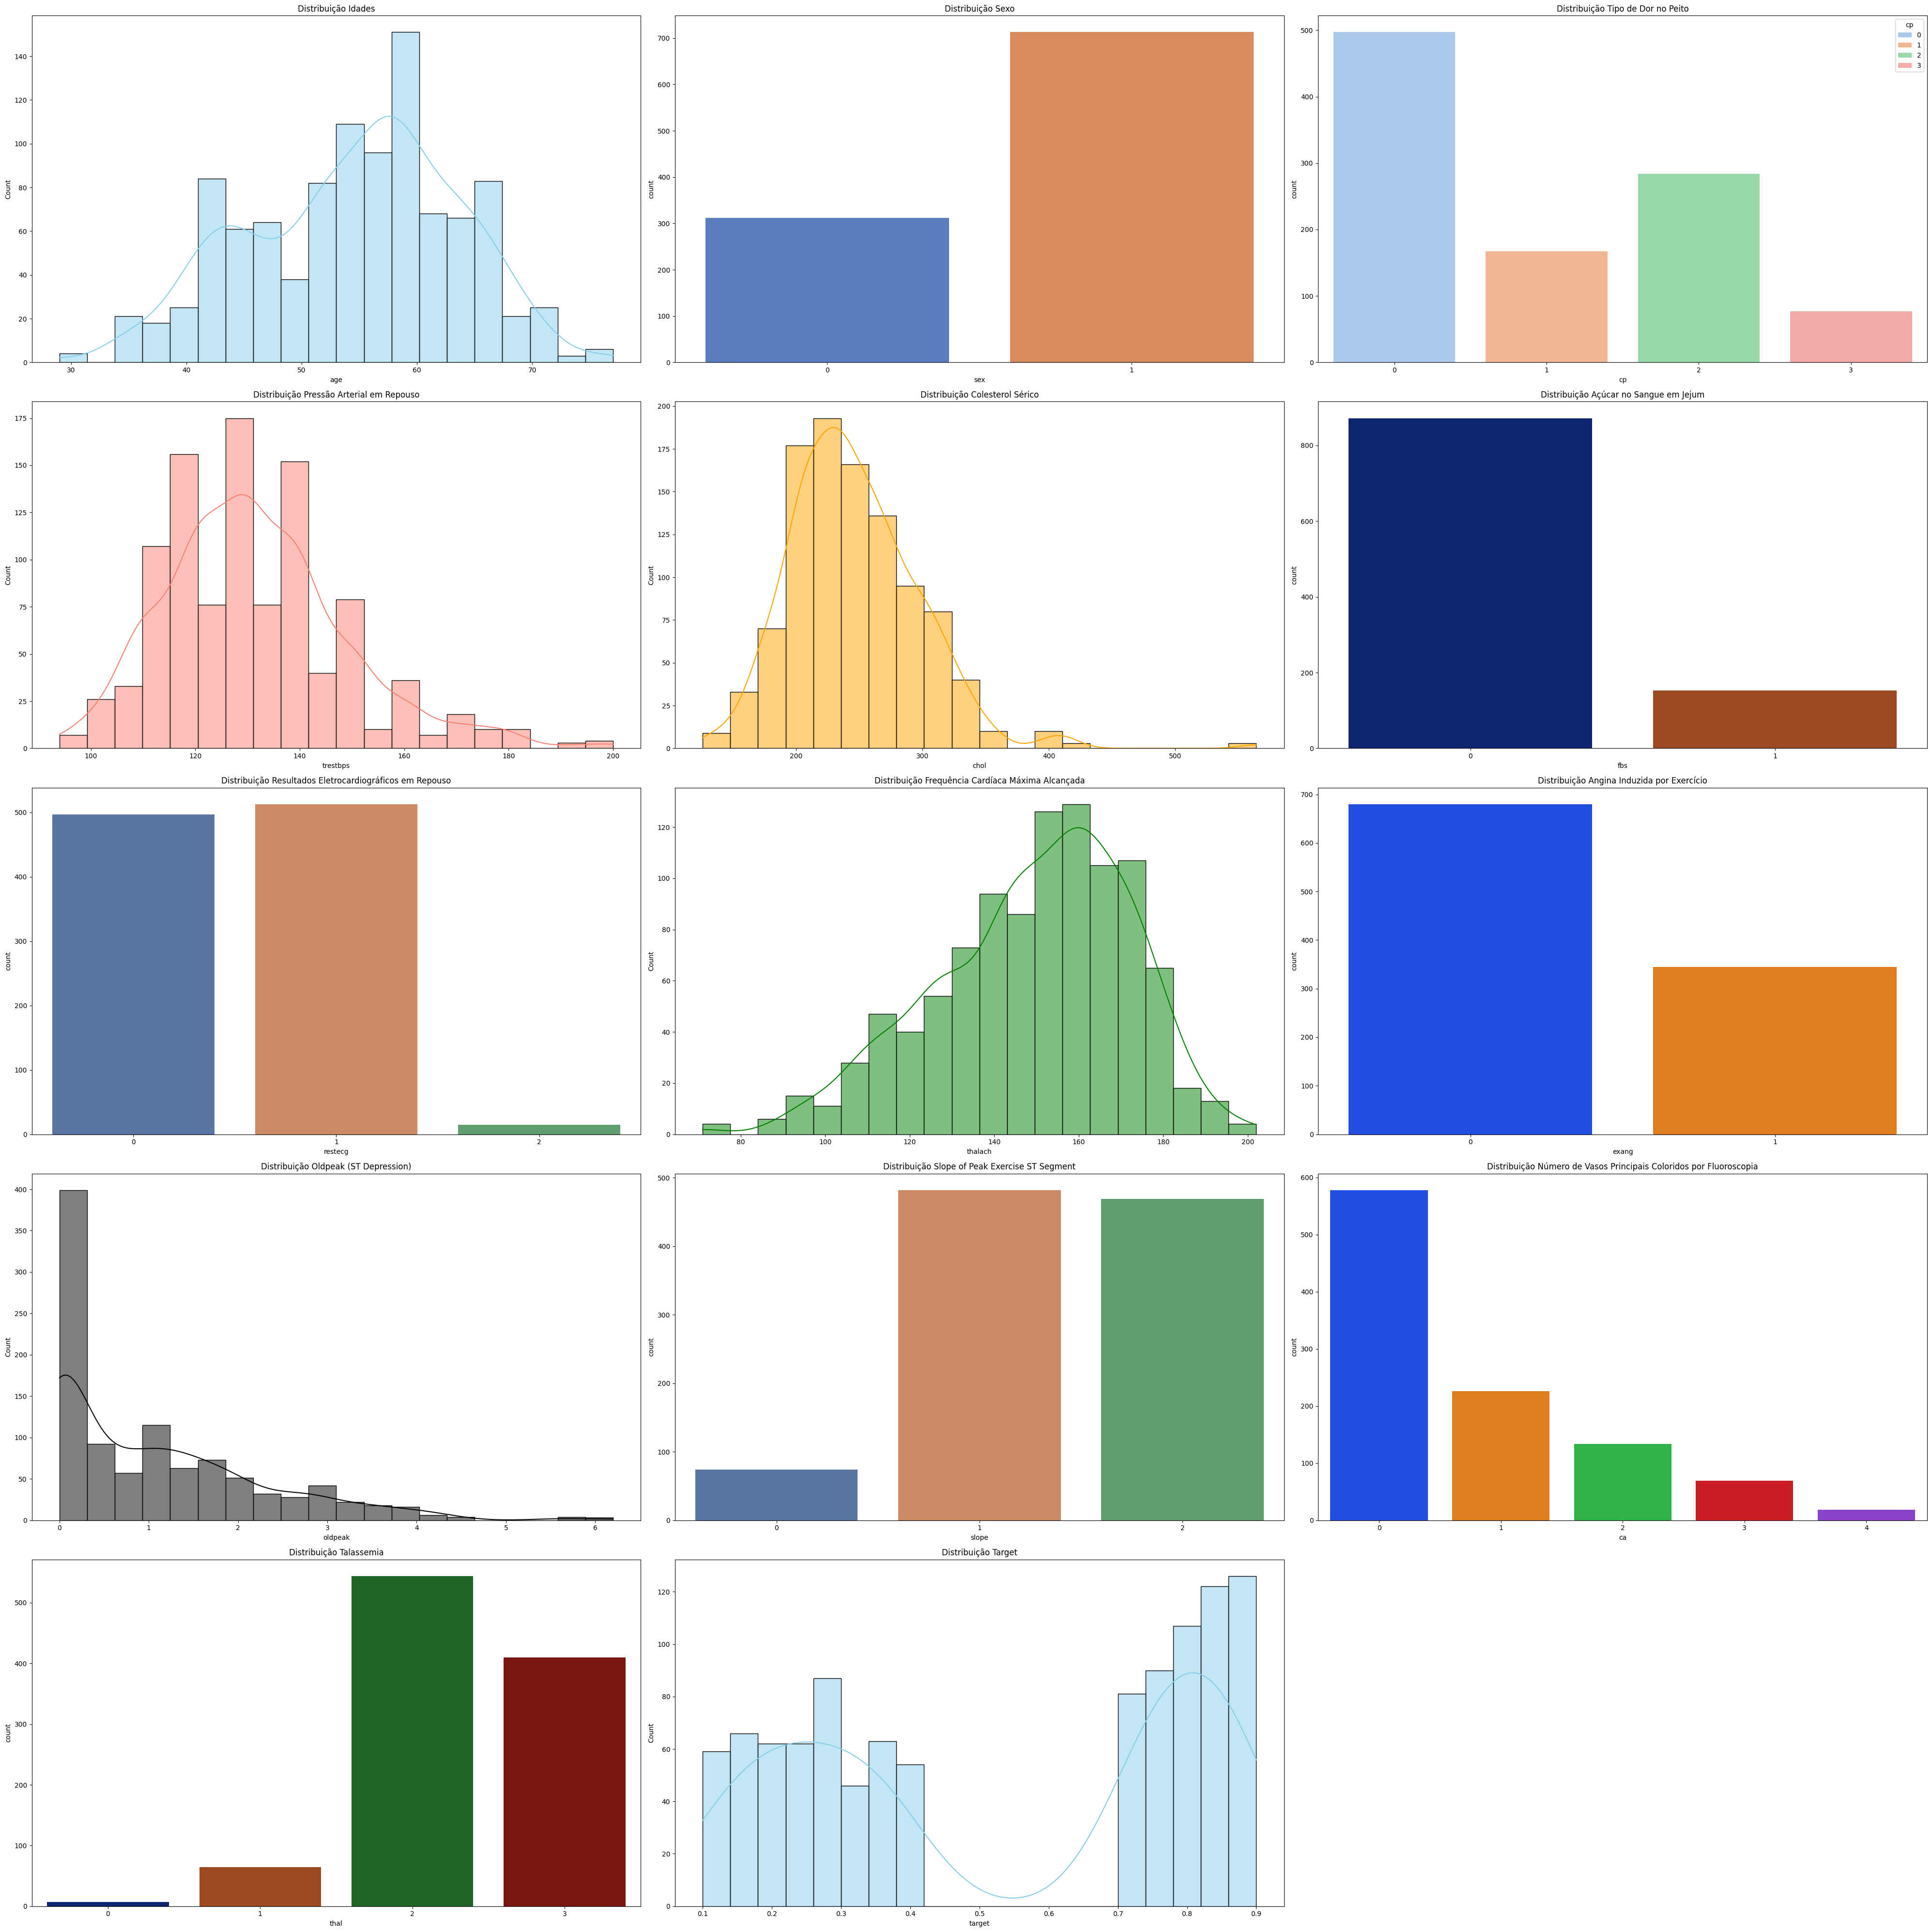

In [100]:
plt.figure(figsize=(40, 40))

# age Distribution
plt.subplot(5, 3, 1)
sns.histplot(df['age'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição Idades')

# sex Distribution
plt.subplot(5, 3, 2)
ax = sns.countplot(x='sex', hue='sex', data=df, palette='muted')
ax.legend().set_visible(False)
plt.title('Distribuição Sexo')

# cp Distribution
plt.subplot(5, 3, 3)
ax = sns.countplot(x='cp', hue='cp', data=df, palette='pastel')
plt.title('Distribuição Tipo de Dor no Peito')

# trestbps Distribution
plt.subplot(5, 3, 4)
sns.histplot(df['trestbps'], bins=20, kde=True, color='salmon')
plt.title('Distribuição Pressão Arterial em Repouso')

# chol Distribution
plt.subplot(5, 3, 5)
sns.histplot(df['chol'], bins=20, kde=True, color='orange')
plt.title('Distribuição Colesterol Sérico')

# fbs Distribution
plt.subplot(5, 3, 6)
ax = sns.countplot(x='fbs', hue='fbs', data=df, palette='dark')
ax.legend().set_visible(False)
plt.title('Distribuição Açúcar no Sangue em Jejum')

# restecg Distribution
plt.subplot(5, 3, 7)
ax = sns.countplot(x='restecg', hue='restecg', data=df, palette='deep')
ax.legend().set_visible(False)
plt.title('Distribuição Resultados Eletrocardiográficos em Repouso')

# thalach Distribution
plt.subplot(5, 3, 8)
sns.histplot(df['thalach'], bins=20, kde=True, color='green')
plt.title('Distribuição Frequência Cardíaca Máxima Alcançada')

# exang Distribution
plt.subplot(5, 3, 9)
ax = sns.countplot(x='exang', hue='exang', data=df, palette='bright')
ax.legend().set_visible(False)
plt.title('Distribuição Angina Induzida por Exercício')

# oldpeak Distribution
plt.subplot(5, 3, 10)
sns.histplot(df['oldpeak'], bins=20, kde=True, color='black')
plt.title('Distribuição Oldpeak (ST Depression)')

# slope Distribution
plt.subplot(5, 3, 11)
ax = sns.countplot(x='slope', hue='slope', data=df, palette='deep')
ax.legend().set_visible(False)
plt.title('Distribuição Slope of Peak Exercise ST Segment')

# ca Distribution
plt.subplot(5, 3, 12)
ax = sns.countplot(x='ca', hue='ca', data=df, palette='bright')
ax.legend().set_visible(False)
plt.title('Distribuição Número de Vasos Principais Coloridos por Fluoroscopia')

# thal Distribution
plt.subplot(5, 3, 13)
ax = sns.countplot(x='thal', hue='thal', data=df, palette='dark')
ax.legend().set_visible(False)
plt.title('Distribuição Talassemia')

# target Distribution
plt.subplot(5, 3, 14)
sns.histplot(df['target'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição Target')

plt.tight_layout()
plt.show()

# Working With Duplicates

## Encontrar as correlações com relação à `target`

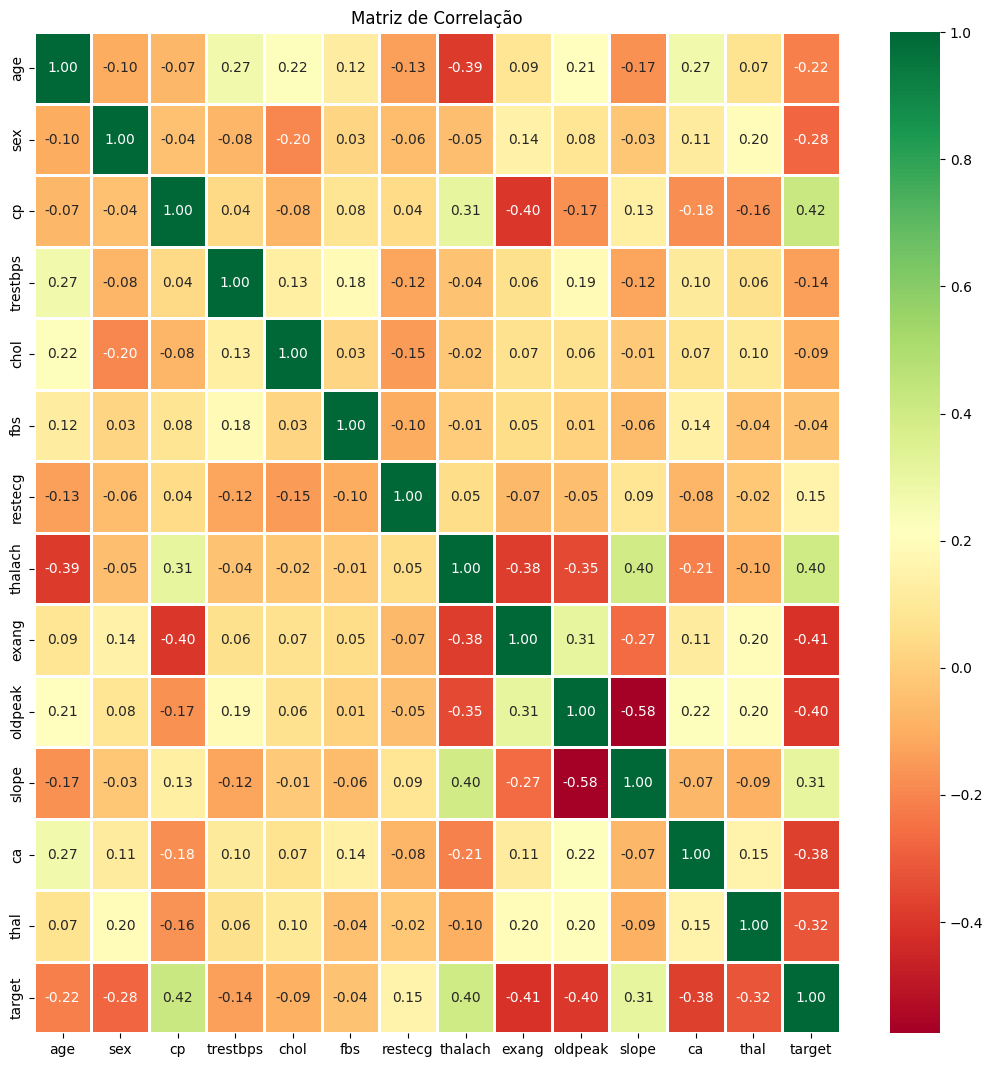

In [101]:
dataset = df

corr = dataset.corr()

plt.figure(figsize=(13, 13))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.8)
plt.title('Matriz de Correlação')
plt.show()

In [102]:
# Split the data in target and value
X = dataset.iloc[:, :13]
y = dataset.iloc[:, 13]

# Split the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Removing Duplicates

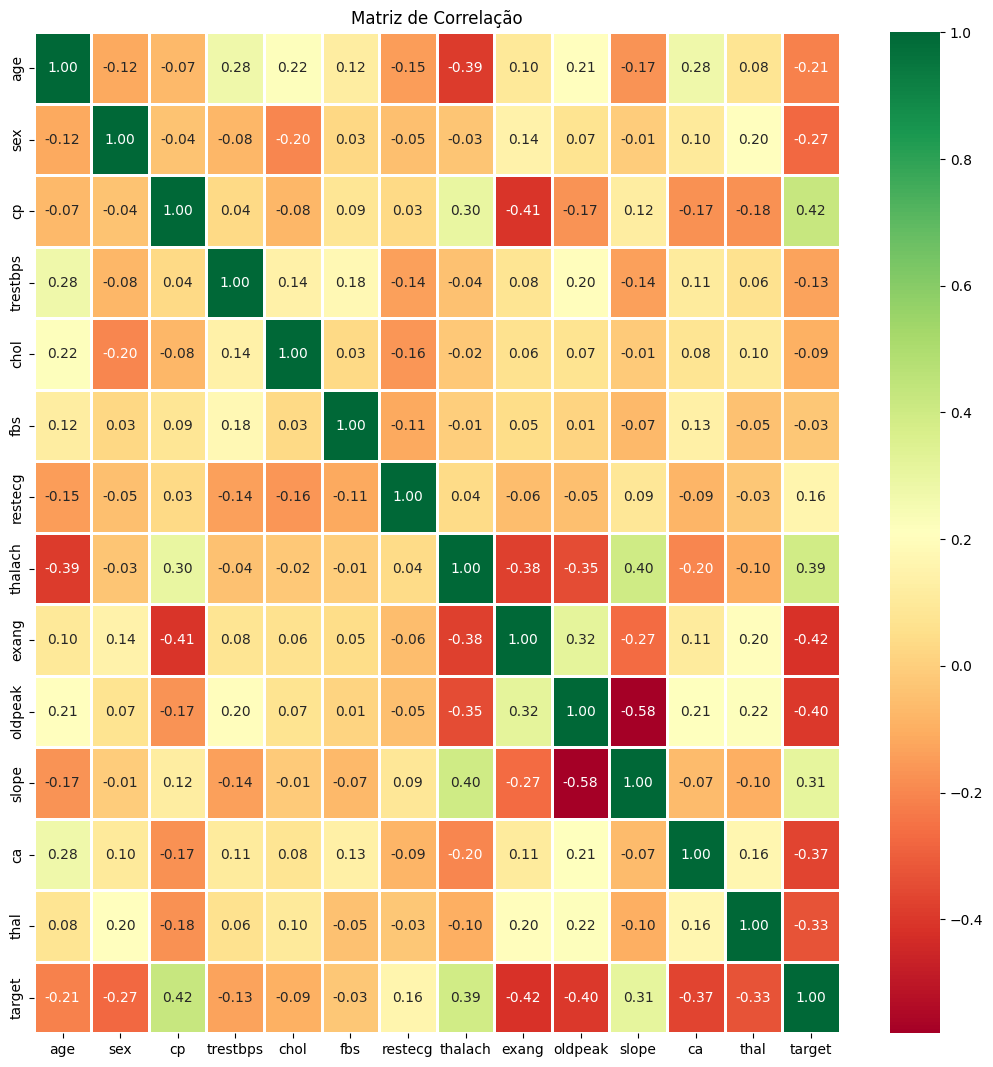

In [80]:
dataset = df.drop_duplicates()

corr = dataset.corr()

plt.figure(figsize=(13, 13))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.8)
plt.title('Matriz de Correlação')
plt.show()

In [68]:
# Split the data in target and value
X = dataset.iloc[:, :13]
y = dataset.iloc[:, 13]

# Split the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Defining Models

In [103]:
models = [
    LinearRegression(), 
    KNeighborsRegressor(n_neighbors=6, algorithm='auto', leaf_size=50),
    RandomForestRegressor(n_estimators=100, max_depth=5),
    SVR(kernel='rbf', gamma='scale', epsilon=0.1, C=0.1),
    DecisionTreeRegressor(splitter='best'),
    AdaBoostRegressor(n_estimators=100, learning_rate=0.1, loss='linear', random_state=42),
]

model_names = [
    'Linear Regression',
    'K Nearest Neighbors',
    'Random Forests',
    'Support Vector Machines',
    'Decision Trees',
    'Adaptative Boosting',
]

# Iterate over models and plot them

####################
LINEAR REGRESSION
Mean Squared Error = 0.049
Absolute Error = 0.1763


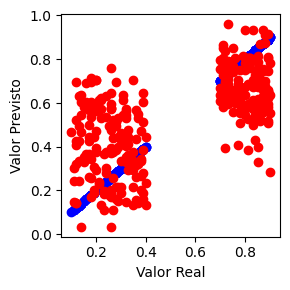

####################
K NEAREST NEIGHBORS
Mean Squared Error = 0.0611
Absolute Error = 0.1981


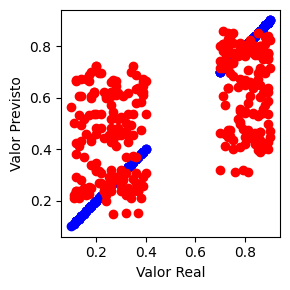

####################
RANDOM FORESTS
Mean Squared Error = 0.0306
Absolute Error = 0.1272


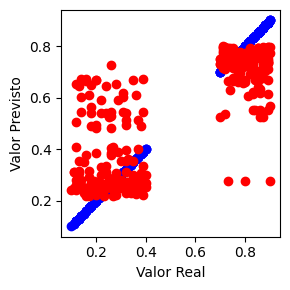

####################
SUPPORT VECTOR MACHINES
Mean Squared Error = 0.0701
Absolute Error = 0.2275


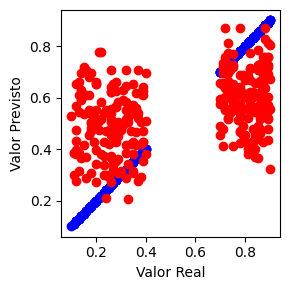

####################
DECISION TREES
Mean Squared Error = 0.0179
Absolute Error = 0.0894


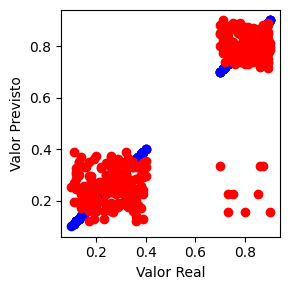

####################
ADAPTATIVE BOOSTING
Mean Squared Error = 0.0377
Absolute Error = 0.1547


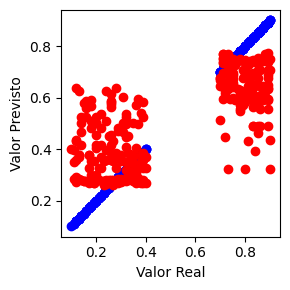

In [104]:
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)
    
    print("#"*20)
    print(f"{model_names[i].upper()}")
    print(f"Mean Squared Error = {round(mean_squared_error(y_test,prediction), 4)}")
    print(f"Absolute Error = {round(mean_absolute_error(y_test, prediction), 4)}")
    
    plot(y_test, prediction)

# Create dataset for new predictions

In [105]:
new_data = [
    [20, 1, 1, 140, 200, 1, 0, 150, 1, 0.5, 2, 4, 2],
    [30, 0, 2, 150, 215, 2, 1, 170, 0, 2.0, 2, 1, 3],
    [40, 0, 2, 145, 200, 0, 2, 190, 0, 2.5, 2, 3, 3]
]

function = lambda x: 'Ataque Cardíaco' if x > 0.75 else 'Sem Ataque Cardíaco'

print("#"*40)
for i, model in enumerate(models):
    new_dataset = pd.DataFrame(
        data=new_data,
        columns=[
            'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
            'oldpeak', 'slope', 'ca', 'thal'
        ]
    )

    new_dataset['target'] = models[i].predict(new_dataset)
    new_dataset['Ataque'] = new_dataset['target'].apply(function)

    print(model_names[i].upper())
    print(new_dataset[['target', 'Ataque']].head())
    print("#"*40)

########################################
LINEAR REGRESSION
     target               Ataque
0  0.348107  Sem Ataque Cardíaco
1  0.679598  Sem Ataque Cardíaco
2  0.638541  Sem Ataque Cardíaco
########################################
K NEAREST NEIGHBORS
     target               Ataque
0  0.785000      Ataque Cardíaco
1  0.498333  Sem Ataque Cardíaco
2  0.806667      Ataque Cardíaco
########################################
RANDOM FORESTS
     target               Ataque
0  0.741403  Sem Ataque Cardíaco
1  0.599902  Sem Ataque Cardíaco
2  0.466606  Sem Ataque Cardíaco
########################################
SUPPORT VECTOR MACHINES
     target               Ataque
0  0.617753  Sem Ataque Cardíaco
1  0.681549  Sem Ataque Cardíaco
2  0.785279      Ataque Cardíaco
########################################
DECISION TREES
   target               Ataque
0  0.8450      Ataque Cardíaco
1  0.2525  Sem Ataque Cardíaco
2  0.2525  Sem Ataque Cardíaco
########################################
ADAPTATIVE

# REFS

- https://www.kaggle.com/code/sathishgsmss/heart-attack-prediction
- https://www.kaggle.com/code/shreya2k/heart-attack-prediction-random-forest-classifier/notebook